In [1]:
import h5py
import os
import argparse
import glob
import numpy as np
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate
import json
import glob

In [2]:
PRED_PATH=r'../repos/latent-diffusion/models/ldm/a/numpy'
PRED_PATH=r'../data/results/bbdm_result.npy'
PRED_PATH = r"F:\minowa\BloodPressureEstimation\repos\latent-diffusion\models\first_stage_models\v3_ppg2abp-kl-f4_2\samples\00187108\2024-12-23-19-14-08\numpy"
PRED_PATH = r"F:\minowa\BloodPressureEstimation\repos\latent-diffusion\models\first_stage_models\v3_ppg2abp-kl-f4_2\samples\00187108\2024-12-23-19-24-17\numpy"
PRED_PATH = r"F:\minowa\BloodPressureEstimation\repos\latent-diffusion\models\ldm\2024-12-23T19-59-41_v3_ppg2abp-kl-f4_1d\samples\00112488\2024-12-23-23-48-12\numpy"
# PRED_PATH=r'../repos/latent-diffusion/models/first_stage_models/v3_ppg2abp-kl-f4_2/samples/00403082/2024-12-03-15-28-49/numpy'
PRED_PATH=r'F:\minowa\BloodPressureEstimation\repos\latent-diffusion\models\ldm\1dv3\samples\00877824\2025-01-21-13-23-16\numpy'

In [122]:
sig_npy = np.load(PRED_PATH)
gt = sig_npy[0].squeeze()
out = sig_npy[1].squeeze()

PermissionError: [Errno 13] Permission denied: 'F:\\minowa\\BloodPressureEstimation\\repos\\latent-diffusion\\models\\ldm\\2024-12-23T19-59-41_v3_ppg2abp-kl-f4_1d\\samples\\00112488\\2024-12-23-23-48-12\\numpy'

In [30]:
# np.savez(nppath, all_img,all_gt_img)
out = []
gt = []
files = glob.glob(PRED_PATH+"/*.npz")
for file in files:
    a = np.load(file)
    _out = a['arr_0'].squeeze()
    _gt = a['arr_1'].squeeze()
    out.append(_out)
    gt.append(_gt)
out = np.concatenate(out)
gt = np.concatenate(gt)

In [31]:
out.shape

(9984, 256)

121

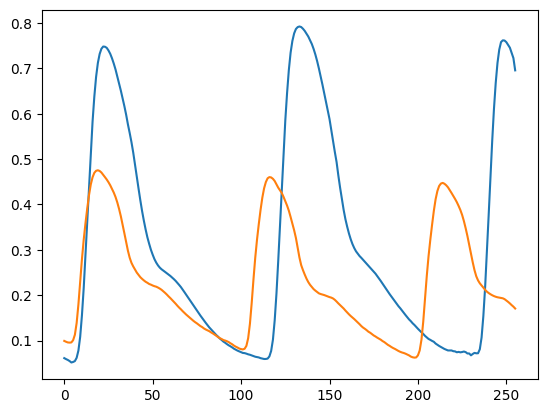

In [4]:
i = np.random.randint(128)
plt.plot(out[i])
plt.plot(gt[i])
i

In [5]:

def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)

In [6]:
# scales = np.load(r"../data\processed\BP_npy\0625_256_2_clean\p00\scale_train.npy")
scales = np.load(r"../data\processed\BP_npy\250107_1152f_corr\p00\scale_train.npy")

In [7]:
gt[:] -= scales[0,0]
gt[:] /= scales[0,1]
out[:] -= scales[0,0]
out[:] /= scales[0,1]

In [8]:
def calc_min_max(x):
    # x = (x.astype(np.float32)/127.5-1)
    return np.nanmin(x,axis=1),np.nanmax(x,axis=1)
gt_min,gt_max = calc_min_max(gt)
out_min,out_max = calc_min_max(out)
errors = np.zeros((2,*out_min.shape))
errors[0,:]=out_min-gt_min
errors[1,:]=out_max-gt_max
gt_mean = np.mean(gt.flatten())
out_mean = np.mean(out.flatten())
gt_std = np.std(gt.mean(axis=1),dtype=np.float64)
out_std = np.std(out.mean(axis=1),dtype=np.float64)
n_samples = errors.shape[1]
me = np.mean(errors,axis=1)
mae = np.mean(np.abs(errors),axis=1)
rmse = np.sqrt(np.mean(errors**2,axis=1))
std = np.std(errors,axis=1)
print(me.shape,mae.shape,rmse.shape,std.shape)
error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100

(2,) (2,) (2,) (2,)


In [ ]:
(me.shape,mae.shape,rmse.shape,std.shape)
error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100

In [ ]:
(me.shape,mae.shape,rmse.shape,std.shape)
error_5 = np.count_nonzero(np.abs(errors)<=5,axis=1)/n_samples*100
error_15 = np.count_nonzero(np.abs(errors)<=15,axis=1)/n_samples*100
error_10 = np.count_nonzero(np.abs(errors)<=10,axis=1)/n_samples*100

In [9]:
print("""
          test data samples:
          # samples : {}
          
          Eval Stats:   DBP    SBP
          MAE:        {:6.3f} {:6.3f}
          RMSE:       {:6.3f} {:6.3f}
          Mean Error: {:6.3f} {:6.3f}
          STD:        {:6.3f} {:6.3f}
          
          BHS standards range:
          Error   <5mmHg <10mmHg <15mmHg
          gradeA     60%     85%     95%
          gradeB     50%     75%     90%
          gradeC     40%     65%     85%
          DBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
          SBP     {:5.1f}%  {:5.1f}%  {:5.1f}%
           
          
          """.format(
            n_samples,
            *mae,
            *rmse,
            *me,
            *std,
            error_5[0], error_10[0], error_15[0],
            error_5[1], error_10[1], error_15[1],
          ))


          test data samples:
          # samples : 9984
          
          Eval Stats:   DBP    SBP
          MAE:        13.252 26.440
          RMSE:       16.792 32.410
          Mean Error:  2.458 12.064
          STD:        16.612 30.082
          
          BHS standards range:
          Error   <5mmHg <10mmHg <15mmHg
          gradeA     60%     85%     95%
          gradeB     50%     75%     90%
          gradeC     40%     65%     85%
          DBP      25.6%   46.0%   63.0%
          SBP      11.9%   23.1%   33.8%
           
          
          


vae 3
"""
 test data samples:
          # samples : 10000
          
          Eval Stats:   DBP    SBP
          MAE:         0.278  0.643
          RMSE:        0.368  0.813
          Mean Error:  0.066 -0.371
          STD:         0.362  0.723
          
          BHS standards range:
          Error   <5mmHg <10mmHg <15mmHg
          gradeA     60%     85%     95%
          gradeB     50%     75%     90%
          gradeC     40%     65%     85%
          DBP     100.0%  100.0%  100.0%
          SBP     100.0%  100.0%  100.0%
           
           """

In [10]:
def bland_altman_plot(pred,gt):
    error = pred - gt
    mean = (pred+gt)/2
    std = np.std(error)
    me = np.mean(error)
    xmin = mean.min()-5
    xmax = mean.max()+10
    plt.scatter(mean,error,s=3)
    plt.hlines(me,xmin,xmax,colors='black',linewidth=1)
    plt.hlines(me+std,xmin,xmax, linestyles='dashed',colors='black',linewidth=1)
    plt.hlines(me-std,xmin,xmax, linestyles='dashed',colors='black',linewidth=1)
    plt.xlabel("Average of Ground Truth and Estimated Value (mmHg)")
    plt.ylabel("Difference between Ground Truth \n and Estimated Value (mmHg)")
    plt.text(xmax, me+std, f"SD={std:.2f}",fontsize='medium', horizontalalignment = "right", verticalalignment ="bottom" ) 
    plt.text(xmax, me+std, f"{me+std:.2f}",fontsize='medium', horizontalalignment = "right", verticalalignment ="top" ) 
    plt.text(xmax, me-std, f"SD={std:.2f}",fontsize='medium', horizontalalignment = "right", verticalalignment ="bottom" ) 
    plt.text(xmax, me-std, f"{me-std:.2f}",fontsize='medium', horizontalalignment = "right", verticalalignment ="top" ) 
    plt.text(xmax, me, f"Mean={me:.2f}",fontsize='medium', horizontalalignment = "right", verticalalignment ="bottom" ) 
    plt.xlim(xmin,xmax)
    

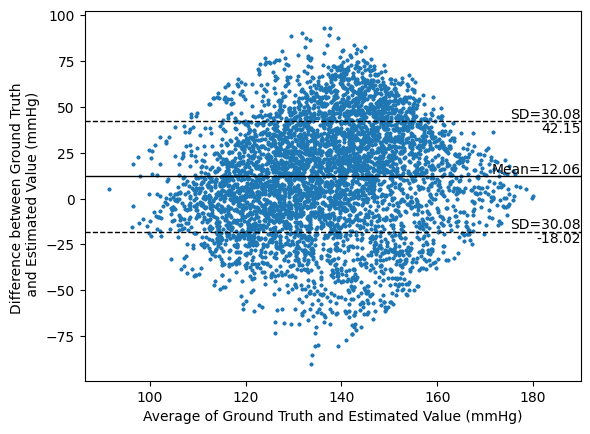

In [11]:
bland_altman_plot(out_max,gt_max)

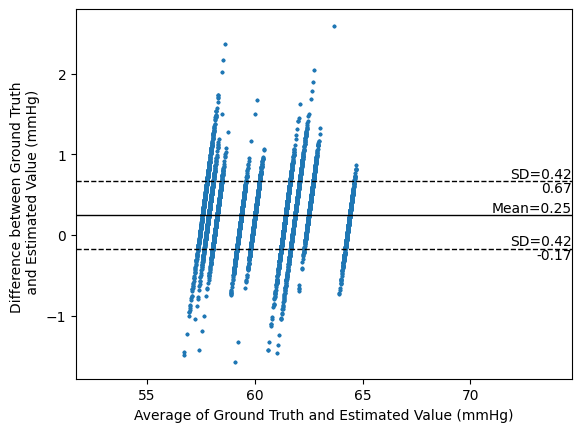

In [68]:
bland_altman_plot(out_min,gt_min)

In [69]:
errors.shape

(2, 10000)

(array([2000.,    0., 1000.,    0.,    0., 1000.,    0., 1000.,    0.,
           0.,    0., 2000., 1000.,    0., 1000.,    0.,    0.,    0.,
           0., 1000.]),
 array([57.49225235, 57.833992  , 58.17572784, 58.5174675 , 58.85920715,
        59.20094299, 59.54268265, 59.8844223 , 60.22615814, 60.5678978 ,
        60.90963745, 61.25137329, 61.59311295, 61.93484879, 62.27658844,
        62.61832809, 62.96006393, 63.30180359, 63.64354324, 63.98527908,
        64.32701874]),
 <BarContainer object of 20 artists>)

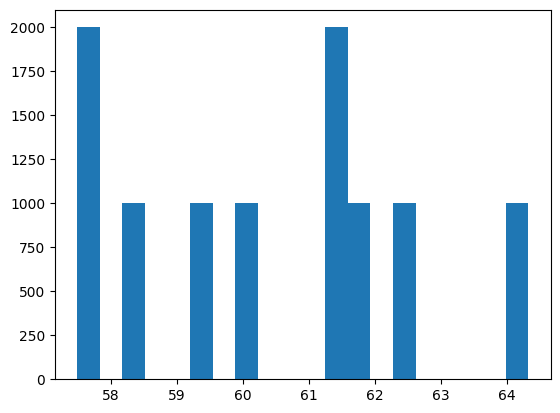

In [ ]:
plt.hist(gt_min,bins=20)

In [ ]:
SBP_hist_20 = np.array([ 83.05228424,  87.48763275,  91.92298126,  96.35832977,
        100.79367828, 105.22902679, 109.66437531, 114.09972382,
        118.53507233, 122.97042084, 127.40577698, 131.84112549,
        136.276474  , 140.71182251, 145.14717102, 149.58251953,
        154.01786804, 158.45321655, 162.88856506, 167.32391357,
        171.75926208])
DBP_hist_20 = np.array([ 50.06516266,  52.79799271,  55.53082275,  58.2636528 ,
         60.99648285,  63.72930908,  66.46214294,  69.19496918,
         71.92780304,  74.66062927,  77.39346313,  80.12628937,
         82.8591156 ,  85.59194946,  88.3247757 ,  91.05760956,
         93.79043579,  96.52326965,  99.25609589, 101.98892975,
        104.72175598])
SBP_hist_20.shape

(21,)

In [70]:
idx = []
mes = np.zeros(20)
sds = np.zeros(20)
for i in range(20):
    r = np.where((SBP_hist_20[i]<=gt_max)&(SBP_hist_20[i+1]>gt_max))[0]
    idx.append(r)
    mes[i] = np.mean(errors[1][r])
    sds[i] = np.std(errors[1][r])

f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
f:\minowa\BloodPressureEstimation\.venv\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
tr_max.shape

NameError: name 'tr_max' is not defined

(80.1352767944336, 184.94149780273438)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


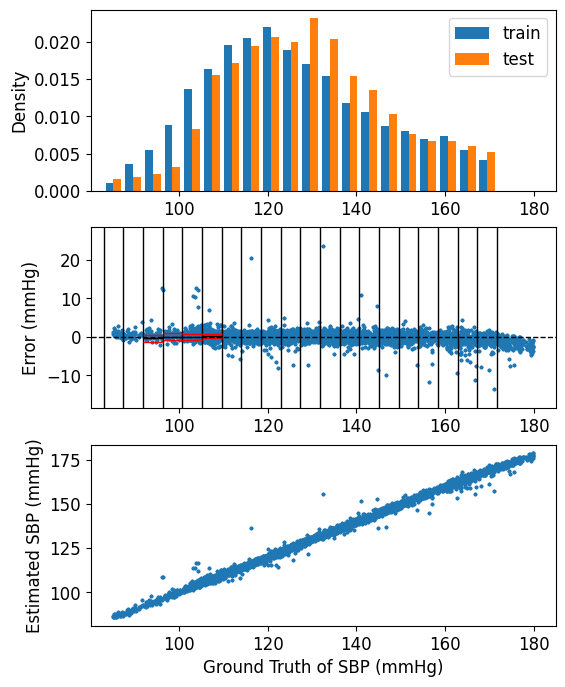

In [108]:
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)   
xmin = gt_max.min()-5
xmax = gt_max.max()+5
plt.hist([tr_max,gt_max],bins=SBP_hist_20,histtype='bar',label=["train","test"],density=True)
plt.legend()
# plt.hist(,bins=SBP_hist_20,histtype='bar',density=True)
# plt.suptitle("")
plt.ylabel("Density")
plt.xlim(xmin,xmax)
plt.subplot(3,1,2)
ymin=errors[1].min()-5
ymax=errors[1].max()+5
plt.xlim(xmin,xmax)
plt.scatter(gt_max,errors[1],s=3)
plt.vlines(SBP_hist_20,ymin=ymin,ymax=ymax,colors="black",linewidth=1)
plt.ylim(ymin,ymax)
plt.hlines(mes,SBP_hist_20[:-1],SBP_hist_20[1:],colors='black',linewidth=1)
plt.hlines(mes+sds,SBP_hist_20[:-1],SBP_hist_20[1:],colors='red',linewidth=1)
plt.hlines(mes-sds,SBP_hist_20[:-1],SBP_hist_20[1:],colors='red',linewidth=1)
plt.hlines(0,xmin,xmax,colors='black',linestyles="dashed",linewidth=1)
plt.ylabel("Error (mmHg)")
plt.text(SBP_hist_20[0], mes[0], f"Mean",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.text(SBP_hist_20[0], mes[0]+sds[0], f"SD",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.text(SBP_hist_20[0], mes[0]-sds[0], f"SD",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.subplot(3,1,3)
plt.ylabel("Estimated SBP (mmHg)")
plt.xlabel("Ground Truth of SBP (mmHg)")
plt.scatter(gt_max,out_max,s=3)
plt.xlim(xmin,xmax)

(array([4.960e+02, 2.018e+03, 2.028e+03, 2.744e+03, 2.214e+03, 4.900e+02,
        8.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([104.02484894, 105.77823639, 107.53162384, 109.28501129,
        111.03839874, 112.79177856, 114.54516602, 116.29855347,
        118.05194092, 119.80532837, 121.55871582]),
 <BarContainer object of 10 artists>)

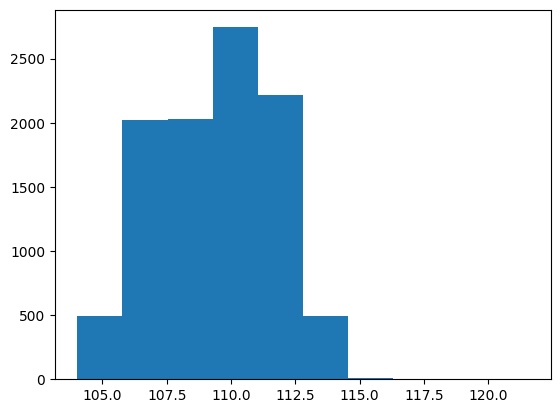

In [72]:
plt.hist(out_max)

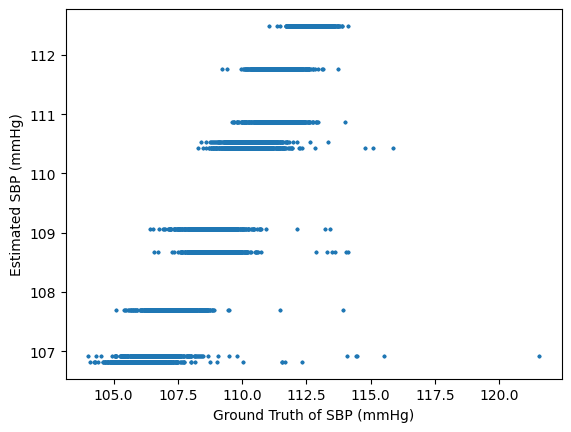

In [73]:
plt.ylabel("Estimated SBP (mmHg)")
plt.xlabel("Ground Truth of SBP (mmHg)")
plt.scatter(out_max,gt_max,s=3)
# plt.xlim(xmin,xmax)

(80.1352767944336, 184.94149780273438)

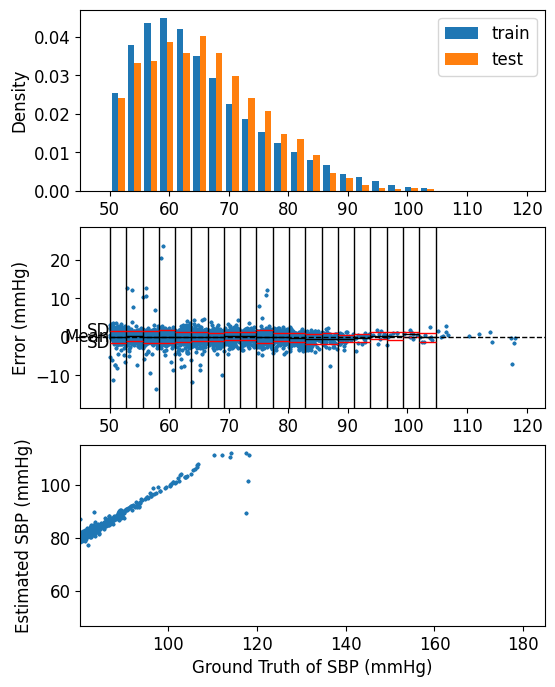

In [109]:
idx = []
mes = np.zeros(20)
sds = np.zeros(20)
for i in range(20):
    r = np.where((DBP_hist_20[i]<=gt_min)&(DBP_hist_20[i+1]>gt_min))[0]
    idx.append(r)
    mes[i] = np.mean(errors[1][r])
    sds[i] = np.std(errors[1][r])
plt.figure(figsize=(6,8))
plt.subplot(3,1,1)   
xmin = gt_min.min()-5
xmax = gt_min.max()+5
plt.hist([tr_min,gt_min],bins=DBP_hist_20,histtype='bar',label=["train","test"],density=True)
plt.legend()
# plt.hist(,bins=SBP_hist_20,histtype='bar',density=True)
# plt.suptitle("")
plt.ylabel("Density")
plt.xlim(xmin,xmax)
plt.subplot(3,1,2)
ymin=errors[1].min()-5
ymax=errors[1].max()+5
plt.xlim(xmin,xmax)
plt.scatter(gt_min,errors[1],s=3)
plt.vlines(DBP_hist_20,ymin=ymin,ymax=ymax,colors="black",linewidth=1)
plt.ylim(ymin,ymax)
plt.hlines(mes,DBP_hist_20[:-1],DBP_hist_20[1:],colors='black',linewidth=1)
plt.hlines(mes+sds,DBP_hist_20[:-1],DBP_hist_20[1:],colors='red',linewidth=1)
plt.hlines(mes-sds,DBP_hist_20[:-1],DBP_hist_20[1:],colors='red',linewidth=1)
plt.hlines(0,xmin,xmax,colors='black',linestyles="dashed",linewidth=1)
plt.ylabel("Error (mmHg)")
plt.text(DBP_hist_20[0], mes[0], f"Mean",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.text(DBP_hist_20[0], mes[0]+sds[0], f"SD",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.text(DBP_hist_20[0], mes[0]-sds[0], f"SD",fontsize='medium', horizontalalignment = "right", verticalalignment ="center" ) 
plt.subplot(3,1,3)
xmin = gt_max.min()-5
xmax = gt_max.max()+5
plt.ylabel("Estimated SBP (mmHg)")
plt.xlabel("Ground Truth of SBP (mmHg)")
plt.scatter(gt_min,out_min,s=3)
plt.xlim(xmin,xmax)

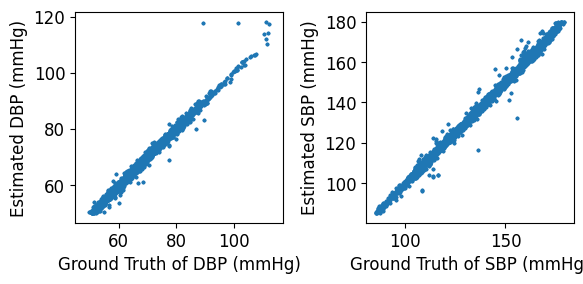

In [110]:
plt.figure(figsize=(6,3))
plt.subplot(121)
xmin = out_min.min()-5
xmax = out_min.max()+5
plt.ylabel("Estimated DBP (mmHg)")
plt.xlabel("Ground Truth of DBP (mmHg)")
plt.scatter(out_min,gt_min,s=3)
plt.xlim(xmin,xmax)
plt.subplot(122)
xmin = out_max.min()-5
xmax = out_max.max()+5
plt.ylabel("Estimated SBP (mmHg)")
plt.xlabel("Ground Truth of SBP (mmHg)")
plt.scatter(out_max,gt_max,s=3)
plt.xlim(xmin,xmax)
plt.tight_layout()

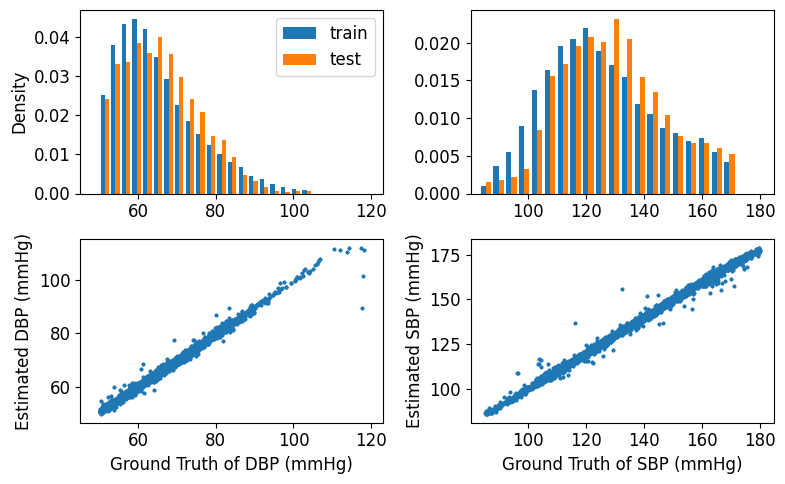

In [111]:
plt.figure(figsize=(8,5))
plt.subplot(221)  
xmin = gt_min.min()-5
xmax = gt_min.max()+5
plt.hist([tr_min,gt_min],bins=DBP_hist_20,histtype='bar',label=["train","test"],density=True)
plt.xlim(xmin,xmax)
plt.ylabel("Density")
plt.legend()
plt.subplot(222)
xmin = gt_max.min()-5
xmax = gt_max.max()+5
plt.hist([tr_max,gt_max],bins=SBP_hist_20,histtype='bar',label=["train","test"],density=True)
plt.xlim(xmin,xmax)
plt.subplot(223)

xmin = gt_min.min()-5
xmax = gt_min.max()+5
plt.ylabel("Estimated DBP (mmHg)")
plt.xlabel("Ground Truth of DBP (mmHg)")
plt.scatter(gt_min,out_min,s=3)
plt.xlim(xmin,xmax)
plt.subplot(224)
xmin = gt_max.min()-5
xmax = gt_max.max()+5
plt.ylabel("Estimated SBP (mmHg)")
plt.xlabel("Ground Truth of SBP (mmHg)")
plt.scatter(gt_max,out_max,s=3)
plt.xlim(xmin,xmax)
plt.tight_layout()


<BarContainer object of 20 artists>

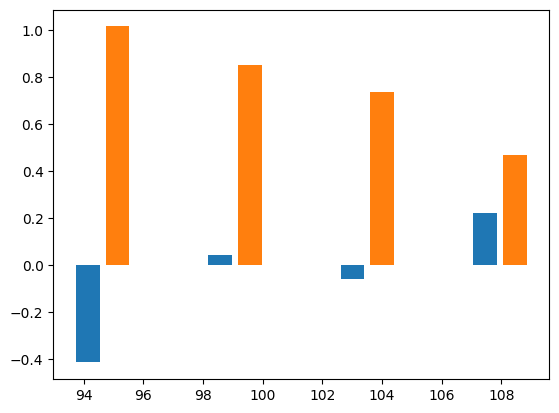

In [76]:
SBP_hist_20_x = [(SBP_hist_20[i]+SBP_hist_20[i+1])/2 for i in range(20)]
plt.bar(SBP_hist_20_x,mes)
plt.bar([i+1 for i in SBP_hist_20_x],sds)

(array([   9.,   52.,  110.,  227.,  360.,  526.,  869., 1342., 1626.,
        1666., 1334.,  876.,  528.,  237.,  104.,   59.,   32.,   16.,
           9.,    2.]),
 array([-85.1566391 , -75.97822723, -66.79981537, -57.6214035 ,
        -48.44299164, -39.26457977, -30.08616791, -20.90775604,
        -11.72934418,  -2.55093231,   6.62747955,  15.80589142,
         24.98430328,  34.16271515,  43.34112701,  52.51953888,
         61.69795074,  70.87636261,  80.05477448,  89.23318634,
         98.41159821]),
 <BarContainer object of 20 artists>)

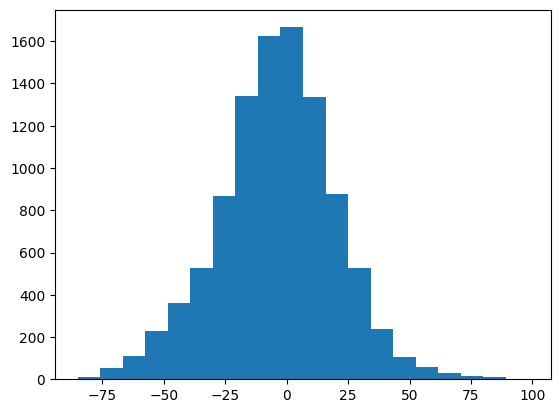

In [ ]:
plt.hist(errors[1],bins=20)

In [13]:
gt_argmin,gt_argmax = np.argmin(gt,axis=1),np.argmax(gt,axis=1)
out_argmin,out_argmax = np.argmin(out,axis=1),np.argmax(out,axis=1)

In [ ]:
errors.shape

(2, 10000)

In [ ]:
# def select_random(len = 8000,random = False):
    # if random:
    #     return np.random.randint(len)
# target = np.where(np.abs(errors[1])<=5)[0]
target = np.where((np.abs(errors[0])>=10) & (np.abs(errors[0])>15))[0]
l = len(target)
i = target[np.random.randint(l)]
    # return i

In [ ]:
plt.rcParams["font.size"]  =10

2875


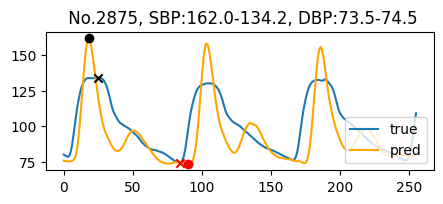

In [28]:
i = np.random.randint(9000)
# i = 14325
# i = select_random()

plt.figure(figsize=(5,1.8))
# plt.subplot(121)
plt.plot(gt[i],label='true')
plt.plot(out[i],c='orange',label='pred')
# plt.plot(cond[i],c='green',label='ppg')
plt.scatter(gt_argmax[i],gt_max[i],marker='x',c='black',zorder=2)
plt.scatter(gt_argmin[i],gt_min[i],marker='x',c='red',zorder=2)
plt.scatter(out_argmax[i],out_max[i],marker='o',c='black',zorder=2)
plt.scatter(out_argmin[i],out_min[i],marker='o',c='red',zorder=2)
plt.legend(loc='lower right')
plt.title(f" No.{i}, SBP:{out_max[i]:.1f}-{gt_max[i]:.1f}, DBP:{out_min[i]:.1f}-{gt_min[i]:.1f}")
print(i)

(0.0, 60.0)

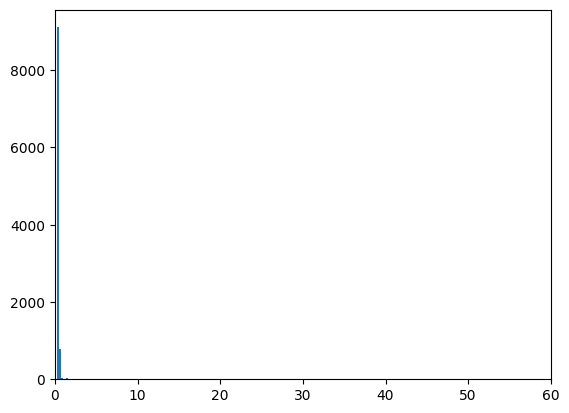

In [85]:
mae = np.mean(np.abs(out-gt),axis=1)
plt.hist(mae,bins=10)
plt.rcParams["font.size"]  =12
plt.xlim(0,60)

(array([  68.,  158.,  362.,  506.,  796., 1312., 1668., 1710., 1362.,
        1006.,  532.,  282.,  144.,   52.,   26.]),
 array([-67.3266449 , -58.55839488, -49.79014486, -41.02189484,
        -32.25364482, -23.4853948 , -14.71714478,  -5.94889476,
          2.81935527,  11.58760529,  20.35585531,  29.12410533,
         37.89235535,  46.66060537,  55.42885539,  64.19710541]),
 <BarContainer object of 15 artists>)

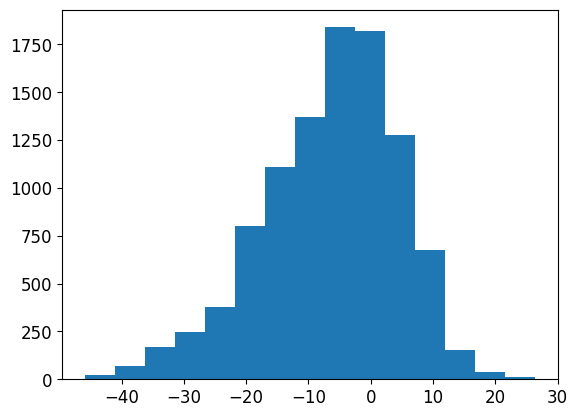

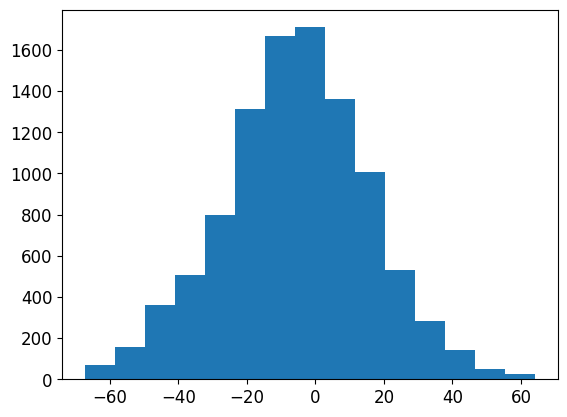

In [ ]:
plt.hist(errors[0],bins=15)
plt.figure()
plt.hist(errors[1],bins=15)

## SBP, DBPの分布


In [ ]:
train = np.load(r"../data\processed\BP_npy\0625_256_2_clean\p00\train.npy")[:,:,0]
train -= scales[0,0]
train /= scales[0,1]
tr_min,tr_max = calc_min_max(train)
t_s_m = np.mean(tr_max)
t_s_s = np.std(tr_max)
t_d_m = np.mean(tr_min)
t_d_s = np.std(tr_min)

In [ ]:
train.shape,out.shape

((103258, 256), (10000, 256))

In [ ]:
g_s_m = np.mean(gt_max)
g_s_s = np.std(gt_max)
g_d_m = np.mean(gt_min)
g_d_s = np.std(gt_min)
o_s_m = np.mean(out_max)
o_s_s = np.std(out_max)
o_d_m = np.mean(out_min)
o_d_s = np.std(out_min)
headers = ["Signal", "Mean","Std"]
table=[]
table.append(["train DBP",t_d_m,t_d_s])
table.append(["train SBP",t_s_m,t_s_s])
table.append(["test  DBP",g_d_m,g_d_s])
table.append(["test  SBP",g_s_m,g_s_s])
table.append(["pred  DBP",o_d_m,o_d_s])
table.append(["pred  SBP",o_s_m,o_s_s])
print(tabulate(table,headers, floatfmt=".4f"))

NameError: name 't_d_m' is not defined

(array([22822.,     0., 22822., 22822., 45644., 22822., 22822., 22822.,
            0., 45644.]),
 array([108.53160095, 108.86373901, 109.1958847 , 109.52802277,
        109.86016083, 110.19230652, 110.52444458, 110.85658264,
        111.1887207 , 111.52086639, 111.85300446]),
 <BarContainer object of 10 artists>)

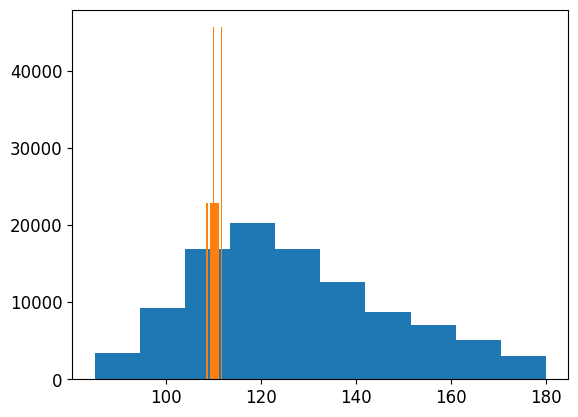

In [98]:
plt.hist(tr_max)
plt.hist(gt_max)


In [87]:
test = np.load(r"F:\minowa\BloodPressureEstimation\data\processed\BP_npy\1127_256_balanced\p00\test.npy")
test[:] -= scales[0,0]
test[:] /= scales[0,1]
test_min, test_max = calc_min_max(test[:,:,0])


In [59]:
test_max.shape

(114139,)

(array([4.48400e+03, 1.06420e+05, 1.14104e+05, 2.81200e+03, 3.56000e+02,
        2.00000e+01, 2.00000e+01, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([105.92415619, 108.07550812, 110.22686005, 112.37821198,
        114.5295639 , 116.68091583, 118.83226776, 120.98361969,
        123.13497162, 125.28632355, 127.43767548]),
 <BarContainer object of 10 artists>)

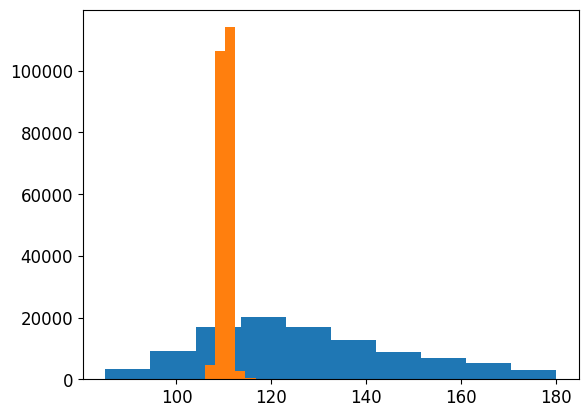

In [99]:
plt.figure()
plt.hist(tr_max)
plt.hist(out_max)

In [100]:
np.unique(gt_max)

array([108.5316  , 109.508484, 109.85039 , 109.996925, 110.436516,
       110.72958 , 110.87612 , 111.75531 , 111.853004], dtype=float32)